In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

#viewing the first 10 rows
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
#identify the number of rows and columns
df.shape

(101766, 50)

In [3]:
#column names
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
#creating new dataframe for columns i want to focus on
df_new = df[['patient_nbr','race', 'gender', 'age', 'admission_type_id', 'insulin', 'diabetesMed', 'readmitted']]
#viewing df_new
df_new


,patient_nbr,race,gender,age,admission_type_id,insulin,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,Up,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,Up,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,Steady,Yes,NO
...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,Down,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,Steady,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,Down,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,Up,Yes,NO


In [5]:
#filter for patients with diabetes
diabetes_patients = df_new[df_new['diabetesMed'] == 'Yes']

#group by race, gender, and age and count the number of patients
grouped_data = diabetes_patients.groupby(['gender', 'race','age']).size().reset_index(name='count')
grouped_data


,gender,race,age,count
0,Female,?,[10-20),3
1,Female,?,[20-30),27
2,Female,?,[30-40),34
3,Female,?,[40-50),74
4,Female,?,[50-60),128
...,...,...,...,...
112,Male,Other,[70-80),128
113,Male,Other,[80-90),34
114,Male,Other,[90-100),5
115,Unknown/Invalid,?,[70-80),1


In [6]:
#Replace "?" with NaN and then drop rows with NaN values
df_new.replace(['?', 'Unknown/Invalid'], pd.NA, inplace=True)
df_cleaned = df_new.dropna()

C:\Users\SMei\AppData\Local\Temp\ipykernel_13852\1682792263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(['?', 'Unknown/Invalid'], pd.NA, inplace=True)


In [7]:
#filter for patients with diabetes again with df_cleaned
diabetes_patients_cleaned = df_cleaned[df_cleaned['diabetesMed'] == 'Yes']

#group by race, gender, and age and count the number of patients again
grouped_data_cleaned = diabetes_patients_cleaned.groupby(['race', 'gender','age']).size().reset_index(name='count')
grouped_data_cleaned


,race,gender,age,count
0,AfricanAmerican,Female,[0-10),7
1,AfricanAmerican,Female,[10-20),116
2,AfricanAmerican,Female,[20-30),304
3,AfricanAmerican,Female,[30-40),588
4,AfricanAmerican,Female,[40-50),1196
...,...,...,...,...
92,Other,Male,[50-60),145
93,Other,Male,[60-70),184
94,Other,Male,[70-80),128
95,Other,Male,[80-90),34


<function matplotlib.pyplot.show(close=None, block=None)>

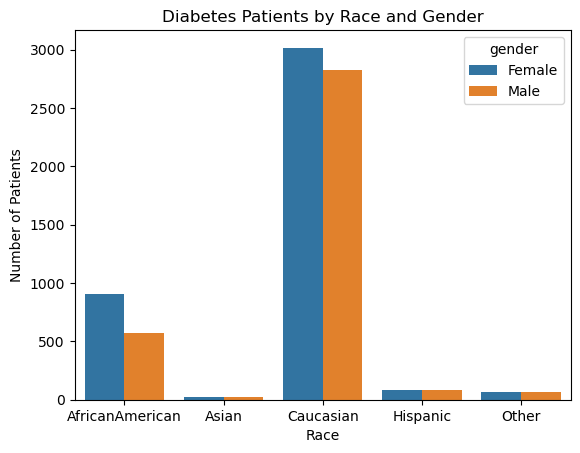

In [8]:
#plotting visualization showing Diabetes Patients by Race and Gender
sns.barplot(x='race', y='count', hue='gender', data=grouped_data_cleaned, errorbar=None)
plt.title('Diabetes Patients by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

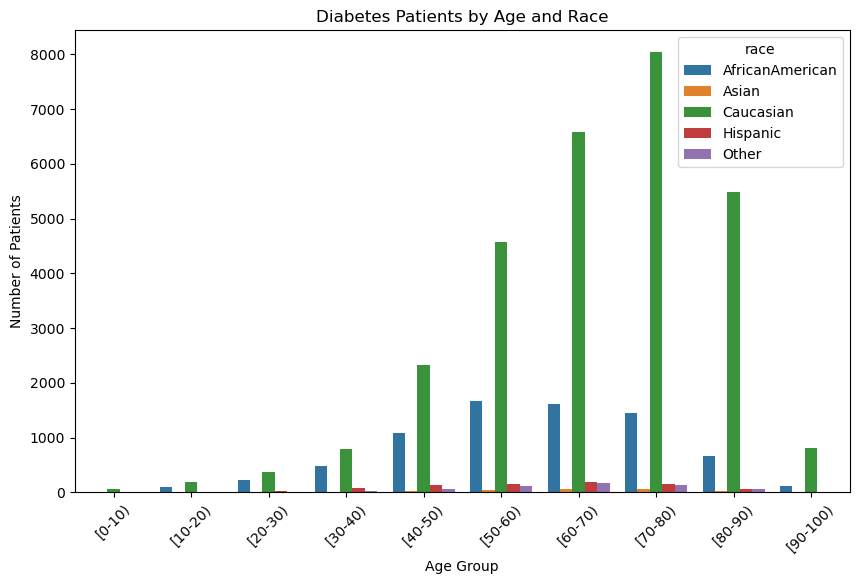

In [9]:
#plotting visualization showing Diabetes Patients by Age Group and Race
plt.figure(figsize =(10, 6))
sns.barplot(x='age', y='count', hue='race', data=grouped_data_cleaned, errorbar=None)
plt.title('Diabetes Patients by Age and Race')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show

In [10]:
print('Conclusion:')
print('Based on the analyzed dataset, it is evident that Caucasion females represent the largest demographic among diabetic patients, whereas Asians comprise of the smallest group in terms of diabetes prevalence. Furthermore, the age group 70-80 exhibits the highest concentration of diabetic patients. It is also interesting to note that there is a notable increaase in dabetic patients starting from age 40 indicating the importance of maintaining a healthier diet especially as you age.')


Conclusion:
Based on the analyzed dataset, it is evident that Caucasion females represent the largest demographic among diabetic patients, whereas Asians comprise of the smallest group in terms of diabetes prevalence. Furthermore, the age group 70-80 exhibits the highest concentration of diabetic patients. It is also interesting to note that there is a notable increaase in dabetic patients starting from age 40 indicating the importance of maintaining a healthier diet especially as you age.
